One Hot Encoding is used to encode nominal categorical variables.


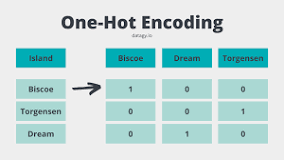

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/mercedez bentenz.csv', usecols = [	'X0',	'X1',	'X2',	'X3',	'X4',	'X5',	'X6',	'X8'])

In [3]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [4]:
# let's have a look at how many labels each variable has

for col in df.columns :
  print(col, ': ', len(df[col].unique()), 'unique values')

X0 :  47 unique values
X1 :  27 unique values
X2 :  44 unique values
X3 :  7 unique values
X4 :  4 unique values
X5 :  29 unique values
X6 :  12 unique values
X8 :  25 unique values


In [5]:
# let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(df, drop_first = True).shape

(4209, 187)

In [6]:
# let's find the top 10 most frequent categories for tha variable x2
df.X2.value_counts().sort_values(ascending = False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [7]:
# let's make a list with the most frequent categories of the variable
top_10 = [x for x in df.X2.value_counts().sort_values(ascending = False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [9]:
# and now we make the 10 binary variables
for label in top_10 :
  df[label] = np.where(df['X2'] == label, 1, 0)

df[['X2'] + top_10].head(10)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [10]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_X_label) :

  for label in top_X_label :
    df[variable+'_'+label] = np.where(df[variable] == label,1,0)

df = pd.read_csv('/content/mercedez bentenz.csv', usecols = [	'X0',	'X1',	'X2',	'X3',	'X4',	'X5',	'X6',	'X8'])

one_hot_top_x(df, 'X2', top_10)
df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,k,v,at,a,d,u,j,o,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,0,0,0,0,1,0,0,0
4,az,v,n,f,d,h,d,n,0,0,0,0,0,0,1,0,0,0
